In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from keras.layers import concatenate

In [21]:
path = "MobiAct_Dataset.csv"
data = pd.read_csv(path)
data

,AvgX,AvgY,AvgZ,MedianX,MedianY,MedianZ,StdX,StdY,StdZ,SkewX,...,AbsMaxZ,AbsSlope,MeanMag,StdMag,MinMag,MaxMag,DiffMinMaxMag,ZCR_Mag,AverageResultantAcceleration,label
0,7.079540,0.292400,3.763926,8.336310,-0.800637,4.799377,2.868003,4.616586,2.274586,-1.821233,...,12.732082,25.968431,99.065435,37.258635,29.541558,567.998312,538.456755,0,99.065435,BSC
1,7.173739,1.640782,4.361933,7.536947,1.973893,5.578871,2.253994,3.824003,2.581553,-1.826785,...,13.052741,28.237861,99.534564,41.252435,30.958310,514.237251,483.278940,0,99.534564,BSC
2,7.330632,2.381979,3.417897,8.192033,3.039308,4.317029,2.640936,4.069859,2.199644,-1.708481,...,10.945221,27.597204,99.455316,40.969060,20.501091,523.780867,503.279777,0,99.455316,BSC
3,-5.568553,-0.217635,6.616517,-6.148310,-0.676446,7.363430,2.473055,3.530614,1.962968,1.075171,...,18.426916,31.743260,97.257094,56.157126,2.593039,961.689593,959.096554,0,97.257094,BSC
4,-4.795033,0.358094,7.179030,-5.434174,0.013750,7.892242,2.168915,3.643256,2.230609,1.192495,...,19.105164,32.353318,97.600097,63.150734,2.032286,1033.791111,1031.758825,0,97.600097,BSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,1.634981,9.675176,0.571712,1.424729,9.680670,-0.137044,2.317456,3.162076,2.663163,0.984920,...,10.743226,22.767045,119.070444,77.191411,9.756531,526.605675,516.849143,0,119.070444,WAL
3290,0.024351,9.846186,0.012902,0.112443,9.820437,-0.388864,2.188469,3.014187,2.905252,-0.370210,...,16.535442,26.763433,119.262972,76.504228,0.654602,627.621581,626.966979,0,119.262972,WAL
3291,0.922415,9.858990,0.537263,0.838491,10.017472,-0.104868,2.124396,3.160946,3.103680,0.506166,...,16.363878,27.488127,122.476247,86.439565,5.432543,609.133832,603.701288,0,122.476247,WAL
3292,-0.194713,9.920477,0.347196,0.069789,9.875457,-0.178162,2.908753,2.944075,2.564336,-1.093212,...,16.409150,28.539022,122.278158,84.649215,6.421978,657.409980,650.988002,0,122.278158,WAL


In [3]:
data.columns

Index(['AvgX', 'AvgY', 'AvgZ', 'MedianX', 'MedianY', 'MedianZ', 'StdX', 'StdY',
       'StdZ', 'SkewX', 'SkewY', 'SkewZ', 'KurtosisX', 'KurtosisY',
       'KurtosisZ', 'MinX', 'MinY', 'MinZ', 'MaxX', 'MaxY', 'MaxZ', 'Slope',
       'MeanTA', 'StdTA', 'SkewTA', 'KurtosisTA', 'AbsX', 'AbsY', 'AbsZ',
       'AbsMeanX', 'AbsMeanY', 'AbsMeanZ', 'AbsMedianX', 'AbsMedianY',
       'AbsMedianZ', 'AbsStdX', 'AbsStdY', 'AbsStdZ', 'AbsSkewX', 'AbsSkewY',
       'AbsSkewZ', 'AbsKurtosisX', 'AbsKurtosisY', 'AbsKurtosisZ', 'AbsMinX',
       'AbsMinY', 'AbsMinZ', 'AbsMaxX', 'AbsMaxY', 'AbsMaxZ', 'AbsSlope',
       'MeanMag', 'StdMag', 'MinMag', 'MaxMag', 'DiffMinMaxMag', 'ZCR_Mag',
       'AverageResultantAcceleration', 'label'],
      dtype='object')

In [4]:
data['label'].value_counts()

SCH    365
STN    365
STU    364
CSO    360
CSI    358
SDL    192
FKL    192
FOL    192
BSC    191
JUM    183
JOG    183
CHU    114
WAL     61
STD     60
SBW     19
SBE     19
SIT     19
SLH     19
SLW     19
SRH     19
Name: label, dtype: int64

Activities of Daily Living:
+----+------+--------------+--------+----------+--------------------------------+

| id | Code | Activity     | Trials | Duration | Description                    |

+----+------+--------------+--------+----------+--------------------------------+

| 1  | STD  | Standing     | 1      | 5m       | Standing with subtle movements |

| 2  | WAL  | Walking      | 1      | 5m       | Normal walking                 |

| 3  | JOG  | Jogging      | 3      | 30s      | Jogging                        |

| 4  | JUM  | Jumping      | 3      | 30s      | Continuous jumping             |

| 5  | STU  | Stairs up    | 6      | 10s      | Stairs up (10 stairs)          |

| 6  | STN  | Stairs down  | 6      | 10s      | Stairs down (10 stairs)        |

| 7  | SCH  | Sit chair    | 6      | 6s       | Sitting on a chair             |

| 8  | CSI  | Car-step in  | 6      | 6s       | Step in a car                  |

| 9  | CSO  | Car-step out | 6      | 6s       | Step out a car                 |

+----+------+--------------+--------+----------+--------------------------------+


Falls:
+----+------+--------------------+--------+----------+-----------------------------------------------------

| id | Code | Activity           | Trials | Duration | Description                                             |

+----+------+--------------------+--------+----------+-----------------------------------------------------

| 10 | FOL  | Forward-lying      | 3      | 10s      | Fall Forward from standing, use of hands to dampen fall |

| 11 | FKL  | Front-knees-lying  | 3      | 10s      | Fall forward from standing, first impact on knees       |

| 12 | BSC  | Back-sitting-chair | 3      | 10s      | Fall backward while trying to sit on a chair            |

| 13 | SDL  | Sideward-lying     | 3      | 10s      | Fall sidewards from standing, bending legs              |

+----+------+--------------------+--------+----------+-----------------------------------------------------


Sensors:
+------+---------------+----------------------------------------------------+-------------------------------------------------------------

| Code | Type          | Values                                             | Description                                                  
|
+------+---------------+----------------------------------------------------+-------------------------------------------------------------

| acc  | accelerometer | timestamp(ns),x,y,z(m/s^2)                         | Acceleration force along the x y z axes (including gravity). 

|
| gyro | gyroscope     | timestamp(ns),x,y,z(rad/s)                         | Rate of rotation around the x y z axes (Angular velocity).   

|
| ori  | orientation   | timestamp(ns),Azimuth,Pitch,Roll(degrees)          | Angle around the z x y axes.                                 |


In [128]:
SUB = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,29,30,31]
ADL = ['CSI','CSO','JOG','JUM','SCH','STD','STN','STU','WAL']
FALLS = ['BSC','FKL','FOL','SDL']
ACTIVITYS = ['ADL','FALLS' ]
SENSOR = ['gyro','ori']
ACC = ['timestamp','x_acc','y_acc','z_acc']
gyro = ['timestamp', 'x_gyro','y_gyro','z_gyro']
ori = ['timestamp','Azimuth','Pitch','Roll']

In [160]:
data = pd.DataFrame()

for i in SUB:
    if i in [1, 6, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 30, 31]:
        for act in FALLS:
            for j in range(1,4):
                sensor_data = pd.DataFrame()
                for sensor in SENSOR:
                    if sensor == 'gyro':
                        column = ['timestamp', 'x_gyro','y_gyro','z_gyro']
                    else:
                        column = ['timestamp','Azimuth','Pitch','Roll']
                    path = 'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub' + str(i) + '/FALLS/' + act + '/' + act + '_'+ sensor + '_' + str(i) + '_' + str(j) + '.txt'
                    df = pd.read_csv(path, names = column)
                    df = df.iloc[14:]
                    if len(sensor_data) == 0:
                        sensor_data = pd.concat([sensor_data, df],  axis = 1)
                    else:
                        sensor_data = pd.merge(sensor_data, df, on = 'timestamp')
                sensor_data['activity'] = act
                sensor_data['subject_id'] = i
                sensor_data['segments'] = j 
                data = pd.concat([data, sensor_data], ignore_index = True)
    elif i == 21:
        for act in ['BSC','FKL','FOL']:
            for j in range(1,4):
                sensor_data = pd.DataFrame()
                for sensor in SENSOR:
                    if sensor == 'gyro':
                        column = ['timestamp', 'x_gyro','y_gyro','z_gyro']
                    else:
                        column = ['timestamp','Azimuth','Pitch','Roll']
                    path = 'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub' + str(i) + '/FALLS/' + act + '/' + act + '_'+ sensor + '_' + str(i) + '_' + str(j) + '.txt'
                    df = pd.read_csv(path, names = column)
                    df = df.iloc[14:]
                    if len(sensor_data) == 0:
                        sensor_data = pd.concat([sensor_data, df],  axis = 1)
                    else:
                        sensor_data = pd.merge(sensor_data, df, on = 'timestamp')
                sensor_data['activity'] = act
                sensor_data['subject_id'] = i
                sensor_data['segments'] = j 
                data = pd.concat([data, sensor_data], ignore_index = True)
        
    else:
        for act in FALLS:
            for j in range(1,4):
                sensor_data = pd.DataFrame()
                for sensor in SENSOR:
                    if sensor == 'gyro':
                        column = ['timestamp', 'x_gyro','y_gyro','z_gyro']
                    else:
                        column = ['timestamp','Azimuth','Pitch','Roll']
                    path = 'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub' + str(i) + '/FALLS/' + act + '/' + act + '_'+ sensor + '_' + str(i) + '_' + str(j) + '.txt'
                    df = pd.read_csv(path, names = column)
                    df = df.iloc[14:]
                    if len(sensor_data) == 0:
                        sensor_data = pd.concat([sensor_data, df],  axis = 1)
                    else:
                        sensor_data = pd.merge(sensor_data, df, on = 'timestamp')
                sensor_data['activity'] = act
                sensor_data['subject_id'] = i
                sensor_data['segments'] = j 
                data = pd.concat([data, sensor_data], ignore_index = True)
        
        for act in ADL:
            if act in ['CSO','CSI','SCH','STN','STU']:
                for j in range(1,7):
                    sensor_data = pd.DataFrame()
                    for sensor in SENSOR:
                        if sensor == 'gyro':
                            column = ['timestamp', 'x_gyro','y_gyro','z_gyro']
                        else:
                            column = ['timestamp','Azimuth','Pitch','Roll']
                        path = 'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub' + str(i) + '/ADL/'+ act + '/' + act + '_'+ sensor + '_' + str(i) + '_' + str(j) + '.txt'
                        df = pd.read_csv(path, names = column)
                        df = df.iloc[14:]
                        if len(sensor_data) == 0:
                            sensor_data = pd.concat([sensor_data, df],  axis = 1)
                        else:
                            sensor_data = pd.merge(sensor_data, df, on = 'timestamp')
                    sensor_data['activity'] = act
                    sensor_data['subject_id'] = i
                    sensor_data['segments'] = j 
                    data = pd.concat([data, sensor_data], ignore_index = True)
            
            elif act in ['JOG','JUM']:
                for j in range(1,4):
                    sensor_data = pd.DataFrame()
                    for sensor in SENSOR:
                        if sensor == 'gyro':
                            column = ['timestamp', 'x_gyro','y_gyro','z_gyro']
                        else:
                            column = ['timestamp','Azimuth','Pitch','Roll']
                        path = 'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub' + str(i) + '/ADL/' + act + '/' + act + '_'+ sensor + '_' + str(i) + '_' + str(j) + '.txt'
                        df = pd.read_csv(path, names = column)
                        df = df.iloc[14:]
                        if len(sensor_data) == 0:
                            sensor_data = pd.concat([sensor_data, df],  axis = 1)
                        else:
                            sensor_data = pd.merge(sensor_data, df, on = 'timestamp')
                    sensor_data['activity'] = act
                    sensor_data['subject_id'] = i
                    sensor_data['segments'] = j 
                    data = pd.concat([data, sensor_data], ignore_index = True)
            else:
                sensor_data = pd.DataFrame()
                for sensor in SENSOR:
                    if sensor == 'gyro':
                        column = ['timestamp', 'x_gyro','y_gyro','z_gyro']
                    else:
                        column = ['timestamp','Azimuth','Pitch','Roll']
                    path = 'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub' + str(i) + '/ADL/' + act + '/' + act + '_'+ sensor + '_' + str(i) + '_1.txt'
                    df = pd.read_csv(path, names = column)
                    df = df.iloc[14:]
                    if len(sensor_data) == 0:
                        sensor_data = pd.concat([sensor_data, df],  axis = 1)
                    else:
                        sensor_data = pd.merge(sensor_data, df, on = 'timestamp')
                sensor_data['activity'] = act
                sensor_data['subject_id'] = i
                sensor_data['segments'] = 1 
                data = pd.concat([data, sensor_data], ignore_index = True)

In [161]:
data

,timestamp,x_gyro,y_gyro,z_gyro,Azimuth,Pitch,Roll,activity,subject_id,segments
0,2318294309000,6.015801,-0.96669424,-8.615032,269.54404,14.973698,-63.823357,BSC,1,1
1,2318299108000,-2.6041186,-3.1083877,8.485834,231.00691,11.295996,-65.95823,BSC,1,1
2,2318304077000,-8.140085,0.73914695,0.03970624,270.82086,16.527449,-63.795,BSC,1,1
3,2318309166000,-1.1771374,0.7360926,0.035124753,266.16733,14.573201,-64.291,BSC,1,1
4,2318314032000,-1.1722504,0.74128497,0.033292156,267.49448,16.127186,-64.22787,BSC,1,1
...,...,...,...,...,...,...,...,...,...,...
2364543,6592370131000,-0.02687807,0.002443461,0.018325957,82.726654,-176.766,-77.57876,SDL,31,3
2364544,6592375146000,-0.027794369,-0.008246681,0.016493361,82.72108,-176.76747,-77.57884,SDL,31,3
2364545,6592380255000,-0.025961773,-0.0027488936,0.020463986,82.71472,-176.7697,-77.58349,SDL,31,3
2364546,6592385198000,-0.030848695,-0.010995574,0.018325957,82.70688,-176.77353,-77.59507,SDL,31,3


In [144]:
data.to_csv('Mobiact_gyro_ori.csv')

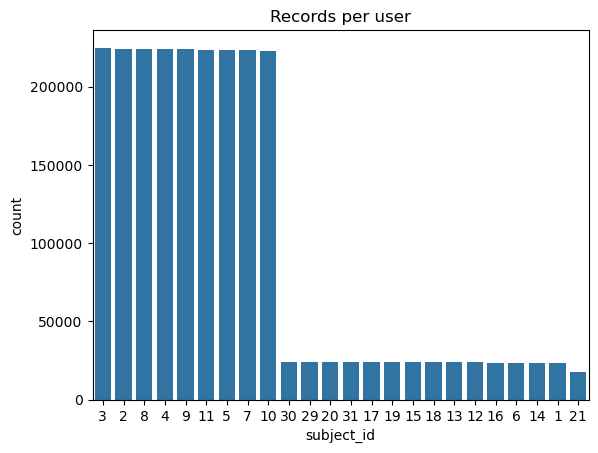

In [150]:
sns.countplot(x = "subject_id", data = data, palette = [sns.color_palette()[0]],
              order = data.subject_id.value_counts().index)
plt.title("Records per user");

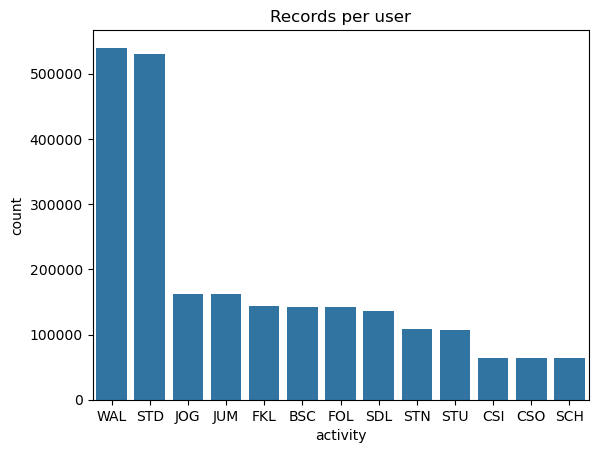

In [163]:
sns.countplot(x = "activity", data = data, palette = [sns.color_palette()[0]],
              order = data.activity.value_counts().index)
plt.title("Records per user");

In [ ]:
'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub2/FALLS/CSI/CSI_gyro_2_1.txt'

In [ ]:
'MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub21/FALLS/SDL/SDL_gyro_21_1.txt'


v2.0 subjects added with only falls performed 1,6, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 29, 30, 31


In [63]:
data = pd.read_csv("C:/Users/procns/Desktop/인공지능/HAR/Mobiact/MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main\sub1/FALLS/BSC/BSC_acc_1_1.txt", names = ACC)

In [64]:
acc_data = data.iloc[14:]
acc_data

,timestamp,x_acc,y_acc,z_acc
14,2318482693000,0.89064306,-9.576807,-0.019153614
15,2318492108000,0.91937345,-9.595961,-0.05746084
16,2318503365000,0.8714894,-9.595961,-0.05746084
17,2318512831000,0.8523358,-9.643845,-0.038307227
18,2318523222000,0.8714894,-9.634268,-0.05746084
...,...,...,...,...
872,2328236293000,-5.439626,5.48751,5.9663506
873,2328248848000,-5.439626,5.439626,5.995081
874,2328261148000,-5.4204726,5.449203,5.9280434
875,2328273880000,-5.4204726,5.45878,5.947197


In [93]:
data2 = pd.read_csv('MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub1/FALLS/BSC/BSC_gyro_1_1.txt', names = GYRO)

In [96]:
gyro_data = data2.iloc[14:]

,timestamp,x_gyro,y_gyro,z_gyro
1975,2328099135000,-9.162979E-4,0.0030543262,0.01038471
1976,2328104101000,9.162979E-4,0.0030543262,0.005497787
1977,2328109088000,0.003970624,0.006414085,0.0033597588
1978,2328114077000,0.008552114,0.007941248,0.0012217305
1979,2328119084000,-0.009162978,0.008552114,0.0125227375
1980,2328124180000,0.007941248,0.006414085,0.0033597588
1981,2328129099000,-0.0030543262,0.0067195175,0.009162978
1982,2328134105000,0.0036651916,0.0125227375,0.01160644
1983,2328139080000,-0.004886922,0.0076358155,0.01038471
1984,2328144081000,-0.0070249503,0.007941248,0.0070249503


In [107]:
data3 = pd.read_csv('MobiAct_Dataset_v2.0-MobiFall_Dataset_v2.0-main/sub1/FALLS/BSC/BSC_ori_1_1.txt', names = ORI)

In [108]:
ori_data = data3.iloc[14:]
ori_data

,timestamp,Azimuth,Pitch,Roll
14,2318294309000,269.54404,14.973698,-63.823357
15,2318299108000,231.00691,11.295996,-65.95823
16,2318304077000,270.82086,16.527449,-63.795
17,2318309166000,266.16733,14.573201,-64.291
18,2318314032000,267.49448,16.127186,-64.22787
...,...,...,...,...
1972,2328259059000,199.6479,-32.859356,-33.25621
1973,2328264080000,199.62746,-32.870003,-33.261387
1974,2328269045000,199.6079,-32.880005,-33.26262
1975,2328279050000,199.59534,-32.887985,-33.26583


In [109]:
merge_data =  pd.DataFrame()
merge_data

""


In [112]:
if len(merge_data) == 0:
        merge_data = pd.concat([merge_data, gyro_data], axis = 1)
else:
        merge_data = pd.merge(merge_data, ori_data, on = 'timestamp')

In [113]:
merge_data

,timestamp,x_gyro,y_gyro,z_gyro,Azimuth,Pitch,Roll
0,2318294309000,6.015801,-0.96669424,-8.615032,269.54404,14.973698,-63.823357
1,2318299108000,-2.6041186,-3.1083877,8.485834,231.00691,11.295996,-65.95823
2,2318304077000,-8.140085,0.73914695,0.03970624,270.82086,16.527449,-63.795
3,2318309166000,-1.1771374,0.7360926,0.035124753,266.16733,14.573201,-64.291
4,2318314032000,-1.1722504,0.74128497,0.033292156,267.49448,16.127186,-64.22787
...,...,...,...,...,...,...,...
1958,2328259059000,-0.007330383,0.0033597588,0.0125227375,199.6479,-32.859356,-33.25621
1959,2328264080000,-9.162979E-4,0.0070249503,0.008552114,199.62746,-32.870003,-33.261387
1960,2328269045000,0.00580322,0.011911872,0.009162978,199.6079,-32.880005,-33.26262
1961,2328279050000,0.0036651916,0.0076358155,0.0076358155,199.59534,-32.887985,-33.26583
